In [1]:
#Paths y entorno
import sys
from pathlib import Path

# Raíz del proyecto
PROJECT_ROOT = Path("..").resolve()

# Rutas importantes
DEPTH_ANYTHING_ROOT = PROJECT_ROOT / "Depth-Anything-V2-main"
CHECKPOINT_PATH = DEPTH_ANYTHING_ROOT / "checkpoints" / "depth_anything_v2_vitl.pth"

YOLO_RUNS = PROJECT_ROOT / "runs"
YOLO_DATASET = PROJECT_ROOT / "data" / "processed" / "yolo_dataset"

# Agregar Depth Anything al path
sys.path.append(str(DEPTH_ANYTHING_ROOT))

print("Proyecto:", PROJECT_ROOT)
print("Checkpoint:", CHECKPOINT_PATH)


Proyecto: C:\Users\Diego\Downloads\Proy_tesisVPP
Checkpoint: C:\Users\Diego\Downloads\Proy_tesisVPP\Depth-Anything-V2-main\checkpoints\depth_anything_v2_vitl.pth


In [2]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO
from depth_anything_v2.dpt import DepthAnythingV2


xFormers not available
xFormers not available


In [4]:
#Cargar Depth Anything V2
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

depth_model = DepthAnythingV2(
    encoder='vitl',
    features=256,
    out_channels=[256, 512, 1024, 1024]
)

depth_model.load_state_dict(
    torch.load(CHECKPOINT_PATH, map_location=device)
)

depth_model.to(device)
depth_model.eval()


Device: cuda


C:\Users\Diego\AppData\Local\Temp\ipykernel_26708\565034232.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(CHECKPOINT_PATH, map_location=device)


DepthAnythingV2(
  (pretrained): DinoVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14))
      (norm): Identity()
    )
    (blocks): ModuleList(
      (0-23): 24 x NestedTensorBlock(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attn): MemEffAttention(
          (qkv): Linear(in_features=1024, out_features=3072, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=1024, out_features=1024, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): LayerScale()
        (drop_path1): Identity()
        (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (drop): Dropout(p=0.0, inplace=Fal

In [8]:
#Estimar profundidad 
def estimate_depth(image_bgr):
    """
    image_bgr: np.ndarray uint8 (tal como sale de cv2.imread)
    """
    with torch.no_grad():
        depth = depth_model.infer_image(image_bgr)

    return depth

uint8 (3024, 4032, 3)


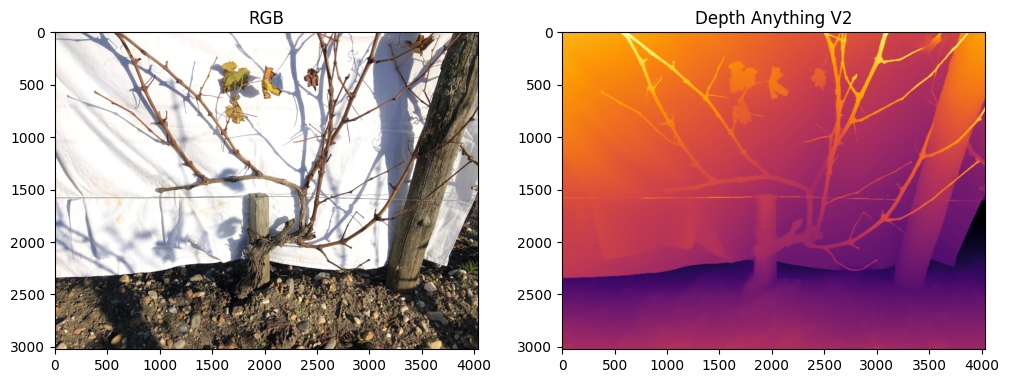

In [10]:
#Prueba rápida (Sanity check)
img_path = list((YOLO_DATASET / "images" / "val").glob("*.jpeg"))[0]

img = cv2.imread(str(img_path))
print(img.dtype, img.shape)  # debe ser uint8

depth = estimate_depth(img)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("RGB")

plt.subplot(1,2,2)
plt.imshow(depth, cmap="inferno")
plt.title("Depth Anything V2")

plt.show()